In [1]:
import numpy as np
import tensorflow as tf

In [2]:
a, b = 1, 0
low=-1; high=1 ; n = 50

trueX = np.random.uniform(low=low, high=high, size=n)
trueY = (a*trueX + b) + np.random.normal(loc=0, scale=.2*max(trueX), size=[len(trueX)])  #stddev = 10%

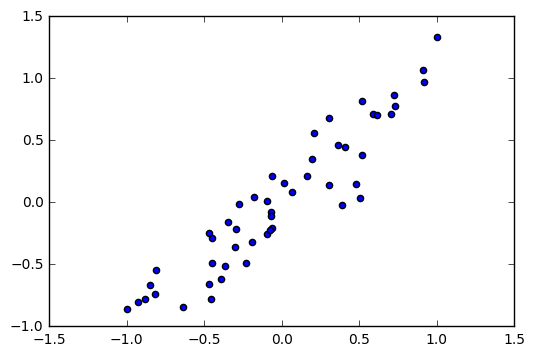

[ 0.06364806 -0.34608459  0.4067936   0.91837418 -0.30353223]
[ 0.08667128 -0.16007465  0.44734322  0.97375258 -0.35978937]


In [3]:
import matplotlib.pyplot as plt
plt.scatter(trueX, trueY)
plt.show()
plt.close()

print trueX[0:5]
print trueY[0:5]

In [4]:
a_guess = 0. ; b_guess = 0.

a = tf.Variable(a_guess)
b = tf.Variable(b_guess)
y = a*trueX + b

In [5]:
loss = tf.reduce_mean(tf.square(y - trueY))   
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [6]:
init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

In [7]:
convergenceTolerance = 0.01
previous_a = np.inf
previous_b = np.inf

steps = {}
steps['a'] = []
steps['b'] = []

for k in range(100000):
    _, _a , _b = session.run([train, a, b]) 
    steps['a'].append(_a)
    steps['b'].append(_b)
    if (np.abs(previous_a - _a) or np.abs(previous_b - _b) ) <= convergenceTolerance :
        print "Finished by Convergence Criterion"
        break
    previous_a = _a, 
    previous_b = _b, 
    
session.close()    

Finished by Convergence Criterion


In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
fig.set_tight_layout(True)
#ax.set_xlim((low, high))
#ax.set_ylim((min(trueY), max(trueY)))

x = np.linspace(low, high,n)

def init():
    line = plt.scatter(trueX, trueY)
    return line
    
def animate(i):
    line = plt.plot(x, steps['a'][i]*x + steps['b'][i])
    return line

#anim = animation.FuncAnimation(fig=fig, func=animate, init_func=init, frames=len(steps['a']), repeat=False, interval=500, blit=False)
anim = animation.FuncAnimation(fig=fig, func=animate, init_func=init, frames=len(steps['a']))
#lines_ani.save('T.gif', writer='imagemagick')
lines_ani.save('LinearRegression-Animation.gif', dpi=100, writer='imagemagick')
plt.close()
HTML("<img src=LinearRegression-Animation.gif>")


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
from IPython.display import HTML

fig, ax = plt.subplots(1, facecolor='white')
x = np.linspace(low, high, n)
ax.set_xlim((low, high))
ax.set_ylim((min(trueY), max(trueY)))
plt.scatter(trueX, trueY)


print len(steps['a']), steps['a']
print len(steps['b']), steps['b']
def makeFrame(timeStep=1):
    i = int(timeStep)
    plt.plot(x, steps['a'][i]*x + steps['b'][i])  # <= Update the curve
    return mplfig_to_npimage(fig) 

animation = mpy.VideoClip(makeFrame, duration=len(steps['a']))
animation.write_gif("LinearRegression-Animation.gif", fps=.75)
plt.close()


12 [0.27441105, 0.47401023, 0.61911345, 0.72459966, 0.80128533, 0.85703373, 0.89756137, 0.92702389, 0.94844234, 0.96401298, 0.97533244, 0.9835614]
12 [0.013186757, 0.016924357, 0.019642984, 0.021619346, 0.023056123, 0.024100602, 0.024859922, 0.02541193, 0.025813228, 0.026104953, 0.026317036, 0.026471199]

[MoviePy] Building file LinearRegression-Animation.gif with imageio


 90%|█████████ | 9/10 [00:00<00:00, 32.73it/s]


In [42]:
HTML("<img src=LinearRegression-Animation.gif>")